In [1]:
import hiive.mdptoolbox as mdptoolbox
import hiive.mdptoolbox.mdp as mdp
import hiive.mdptoolbox.example as example
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [167]:
def plot_helper(dataName, xVals,yVals, xName, yName):
    plt.plot(xVals, yVals)
    plt.ylabel(yName)
    plt.xlabel(xName)
    plt.title(dataName + ": " +  yName + " vs " + xName)
    plt.show()

In [111]:
def plot_2_helper(dataName, xVals,y1Vals, y2Vals, xName, y1Name, y2Name):
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(xVals, y1Vals, color="red")
    ax.set_ylabel(y1Name,color="red",fontsize=14)
    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(xVals,y2Vals,color="blue")
    ax2.set_ylabel(y2Name,color="blue",fontsize=14)

    plt.xlabel(xName)
    #plt.title(dataName + ": " +  yName + " vs " + xName)
    plt.show()

In [19]:
#This Code adapted from: https://github.com/ryanym/cs7641/blob/master/assignment4/experiments.py
def build_matrix(environment, n_states, n_actions):
    """
    Convert openai discrete environment to Probability matrix and Reward matrix
    :param environment:
    :param n_states:
    :param n_actions:
    :return:
    """
    desc = np.reshape(environment.desc,64)
    reward_matrix = np.zeros((n_states, n_actions))
    probability_matrix = np.zeros((n_actions, n_states, n_states))


    for state in range(n_states):
        for action in range(n_actions):
            for data_list in environment.env.P[state][action]:
                prob, next_state, reward, done = data_list
                reward_matrix[state, action] += reward
                if desc[next_state] == b'H':
                    reward_matrix[state, action] -= 1
                probability_matrix[action, state, next_state] = prob
                probability_matrix[action, state, :] = probability_matrix[action, state, :] / \
                                                       np.sum(probability_matrix[action, state, :])

    return probability_matrix, reward_matrix

In [114]:
def frozen_lake():
    env = gym.make('FrozenLake-v1', desc=None,map_name="8x8", is_slippery=True)
    states = env.observation_space.n
    actions = env.action_space.n
    P,R = build_matrix(env, states, actions)
    return P,R

In [137]:
def value_iteration(P,R, gamma):
    vi = mdp.ValueIteration(P,R,gamma)
    results = vi.run()
    return vi, results

In [140]:
def run_n_avg(P,R,gamma, runs):
    
    times = []
    iters =[]
    values = []
    
    for i in range(runs):
        vi, results= value_iteration(P,R,gamma)
        times.append(vi.time)
        iters.append(vi.iter)
        values.append(vi.V)
    
    avg_time = np.mean(np.array(times))
    avg_iters = np.mean(np.array(iters))
    avg_values = np.average(values, axis=0)


    return avg_time, avg_iters, avg_values
        

In [129]:
def value_iteration_gamma_test(P,R):
    
    divisions = 4
    
    times = []
    iters = []
    discounts = []
    avg_values = []
    
    for i in range(1, divisions):
        #Calc Gamma
        discount = (i) / divisions
        #Run and Average 
        time, num_iters, avg_val = run_n_avg(P,R,discount, 1)
        #append data
        discounts.append(discount)
        times.append(time)
        iters.append(num_iters)
        avg_values.append(avg_val)
    
    return discounts, times, iters, avg_values

In [133]:
def value_iteration_value_test(P,R):
    gammas = [.3, .4, .5, .6, .7, .8]
    
    vi = value_iteration(P,R,.5)
    
    plot(helper)
        

IndentationError: expected an indented block (Temp/ipykernel_19232/2765176720.py, line 1)

In [118]:
P, R = frozen_lake()

In [141]:
discounts, times, iters, avg_values = value_iteration_gamma_test(P,R)

In [131]:
avg_values

[array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -9.76562500e-04, -3.28125000e-01,
        -1.64794922e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.19726562e-03, -1.66015625e-02, -2.67272949e-01,
        -1.22680664e-02, -3.28125000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.73535156e-02, -2.73376465e-01, -3.28125000e-01,
        -2.92968750e-03, -7.32421875e-04,  0.00000000e+00,  1.97753906e-02,
         0.00000000e+00, -3.28125000e-01, -3.28125000e-01, -3.09570312e-01,
        -2.07519531e-02, -1.70898438e-02, -3.28125000e-01,  1.53808594e-01,
         0.00000000e+00, -3.28125000e-01, -2.89123535e-01, -3.24279785e-01,
        -3.2

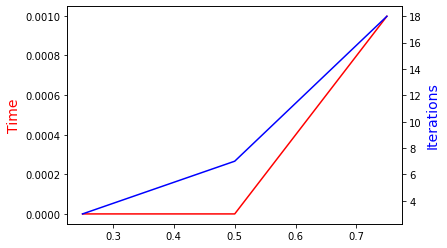

In [132]:
 plot_2_helper("Frozen Lake", discounts,times, iters, "Discount", "Time", "Iterations")

In [195]:
vi, results = value_iteration(P,R,.8)

In [196]:
iters = range(len(results))

iter_num = []
max_v = []
avg_v = []


for i in iters:
    iter_num.append(results[i]['Iteration'])
    max_v.append(results[i]['Max V'])
    avg_v.append(results[i]['Mean V'])


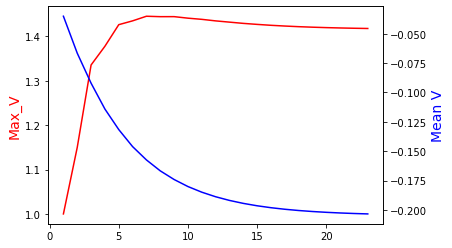

In [197]:
# plot_helper("dataName", iter_num,max_v, "Iteration", "Max_V")
plot_2_helper("dataName", iter_num,max_v, avg_v, "Iteration", "Max_V", "Mean V")